# Import Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")     

# Load the Dataset

In [2]:
df = pd.read_csv("train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [3]:
df.shape             ## check the shape of the data

(45211, 11)

In [4]:
df.info     ## Method in Pandas prints a concise summary of a DataFrame

<bound method DataFrame.info of        age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       

#  Column data type

In [5]:
df.dtypes          ## Method in Pandas returns a Series with the data type of each column in the DataFrame      

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

There is no need to change any datatype of the columns

# Null Value Detection

In [6]:
df.isnull().sum()          

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Duplicated Values Dropped

In [7]:
df.drop_duplicates()        
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


# Basic statistical analysis of dataset

In [8]:
df.describe()                 

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


# Finding the column names

In [9]:
df.columns                  

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# Values counts details for each column

In [10]:
df["age"].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [11]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [12]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df["education_qual"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [14]:
df["call_type"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [15]:
df["mon"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [16]:
df["prev_outcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [17]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# Outlier Deduction and Correction

Outlier Detection

Z-Score Z-Score(x)=(x-mean(x)) / SD(x) Threshold Limit Z-Score > 3 and Z-Score < -3 ---> Outlier
IQR IQR = Q3(75%)-Q1(25%) Upper Threshold = Q3 + (1.5 * IQR) Lower Threshold = Q1 - (1.5 * IQR)
Plotting Box Plot
Outlier Correction

Deletion
Clip/Strip

## Age


In [18]:
# Rename of some column for better understanding
df=df.rename(columns={"mon":"month","dur":"duration", 'y':'result'})

Box Plot

<Axes: >

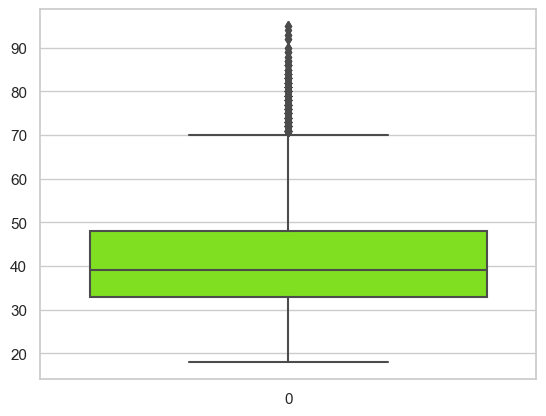

In [19]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(df['age'], color='Chartreuse')

From outlier we can see that there are many dots are displayed outside whisker.

# IQR

In [20]:
#Detecting Outlier for Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [21]:
# Removing outlier for Age
# Removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age = df.age.clip(10.5,70.5)

Checking- After outlier removal

<Axes: >

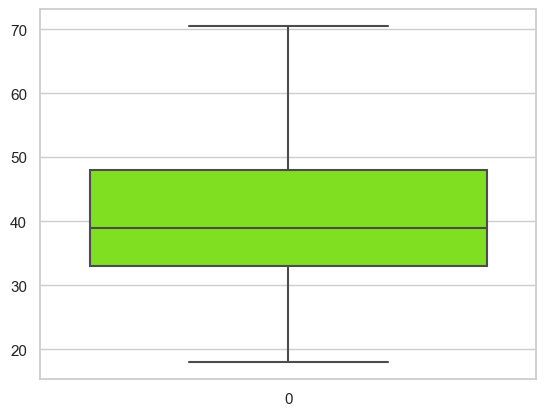

In [22]:
sns.set(style="whitegrid")
sns.boxplot(df['age'], color='Chartreuse')

# Day

box plot

<Axes: >

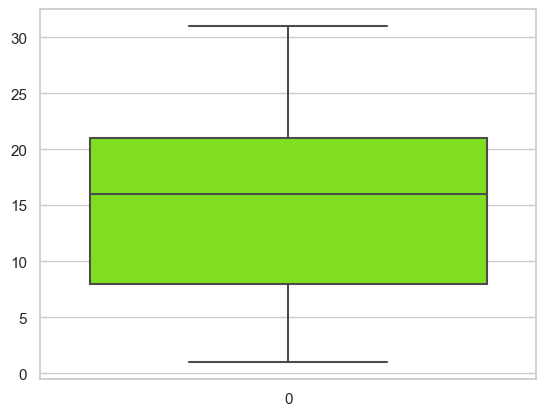

In [23]:
#Outlier Detuction using Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(df['day'], color='Chartreuse')

In [24]:
# Detecting Outlier for Age column
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [25]:
df.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

From Box plot itself we can tell there is no outlier, even though checked with IQR approach. min and max values are in between lower and upper bound.

## Duration

Box Plot

<Axes: >

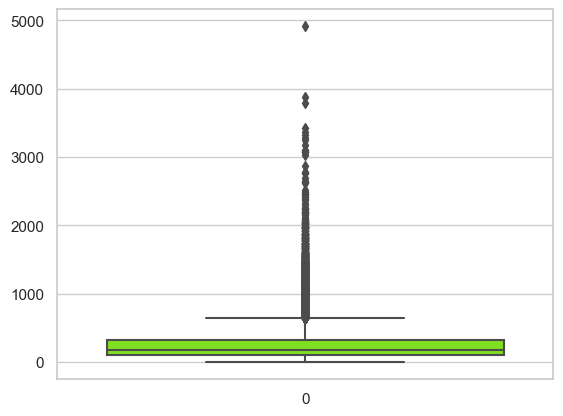

In [26]:
# Outlier Detuction using Box Plot for duration Column
sns.set(style="whitegrid")
sns.boxplot(df['duration'], color='Chartreuse' )

In [27]:
# Detecting Outlier for Duration column
q1,q3=np.percentile(df["duration"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)
     

Upper bound: 643.0 Lower bound : -221.0


Removing Outlier for duration column

In [28]:
# Removing outlier for duration column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.duration = df.duration.clip(-219.5,640.5)

In [29]:
df.duration.describe()    

count    45211.000000
mean       234.759262
std        176.334952
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        640.500000
Name: duration, dtype: float64

<Axes: >

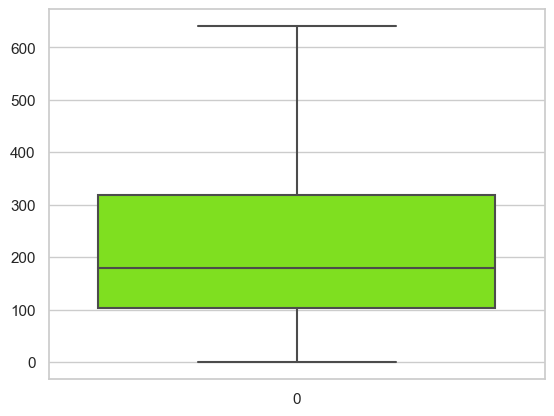

In [30]:
#Checking after outlier removal
sns.set(style="whitegrid")
sns.boxplot(df['duration'], color='Chartreuse')

# No of Calls

box plot

<Axes: >

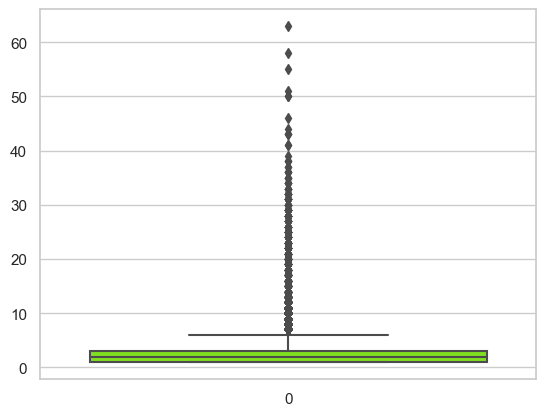

In [31]:
#checking for outlier using boxplot fot the column no of calls
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')     

In [32]:
# Detecting Outlier for number of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [33]:
# Removing outlier for num_calls column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.num_calls = df.num_calls.clip(-2,6.0)     

Checking after outlier removal

<Axes: >

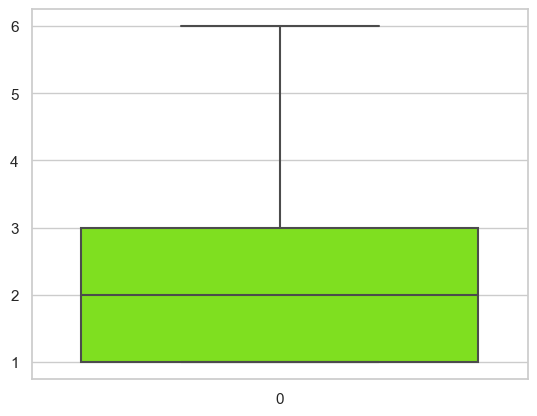

In [34]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='Chartreuse')

For all number columns, we detected and eliminated outliers. Therefore, the data cleaning process is complete.

# EDA - Exploratory Data Analysis

EDA is an important step in the data analysis process, as it helps to identify potential issues with the data and to develop a deeper understanding of the relationships between variables.

<Axes: >

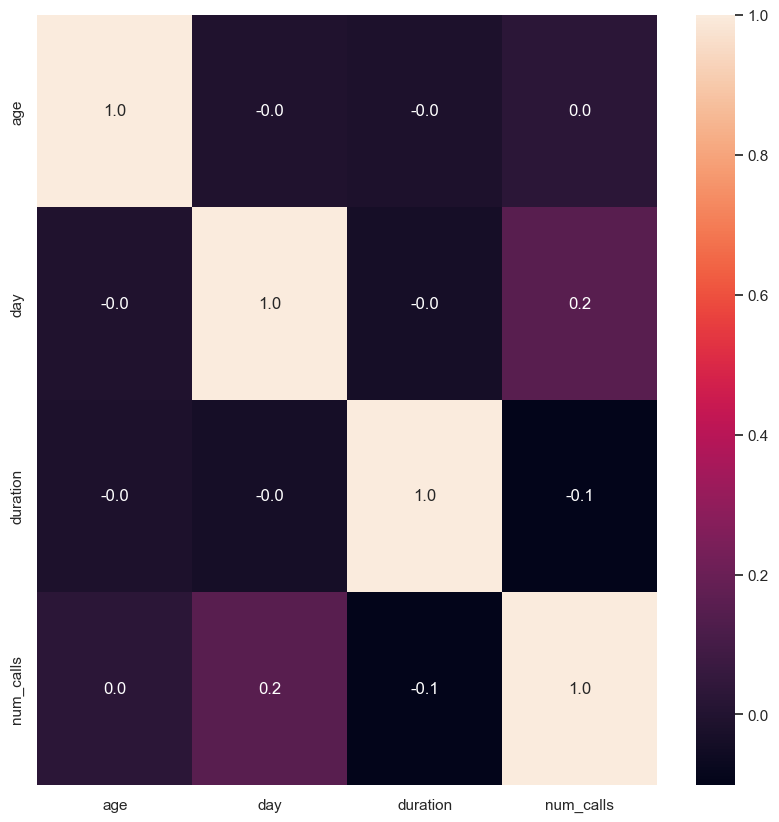

In [35]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, fmt='.1f')

 Check Feature Distribution

In [36]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'month',
       'duration', 'num_calls', 'prev_outcome', 'result'],
      dtype='object')

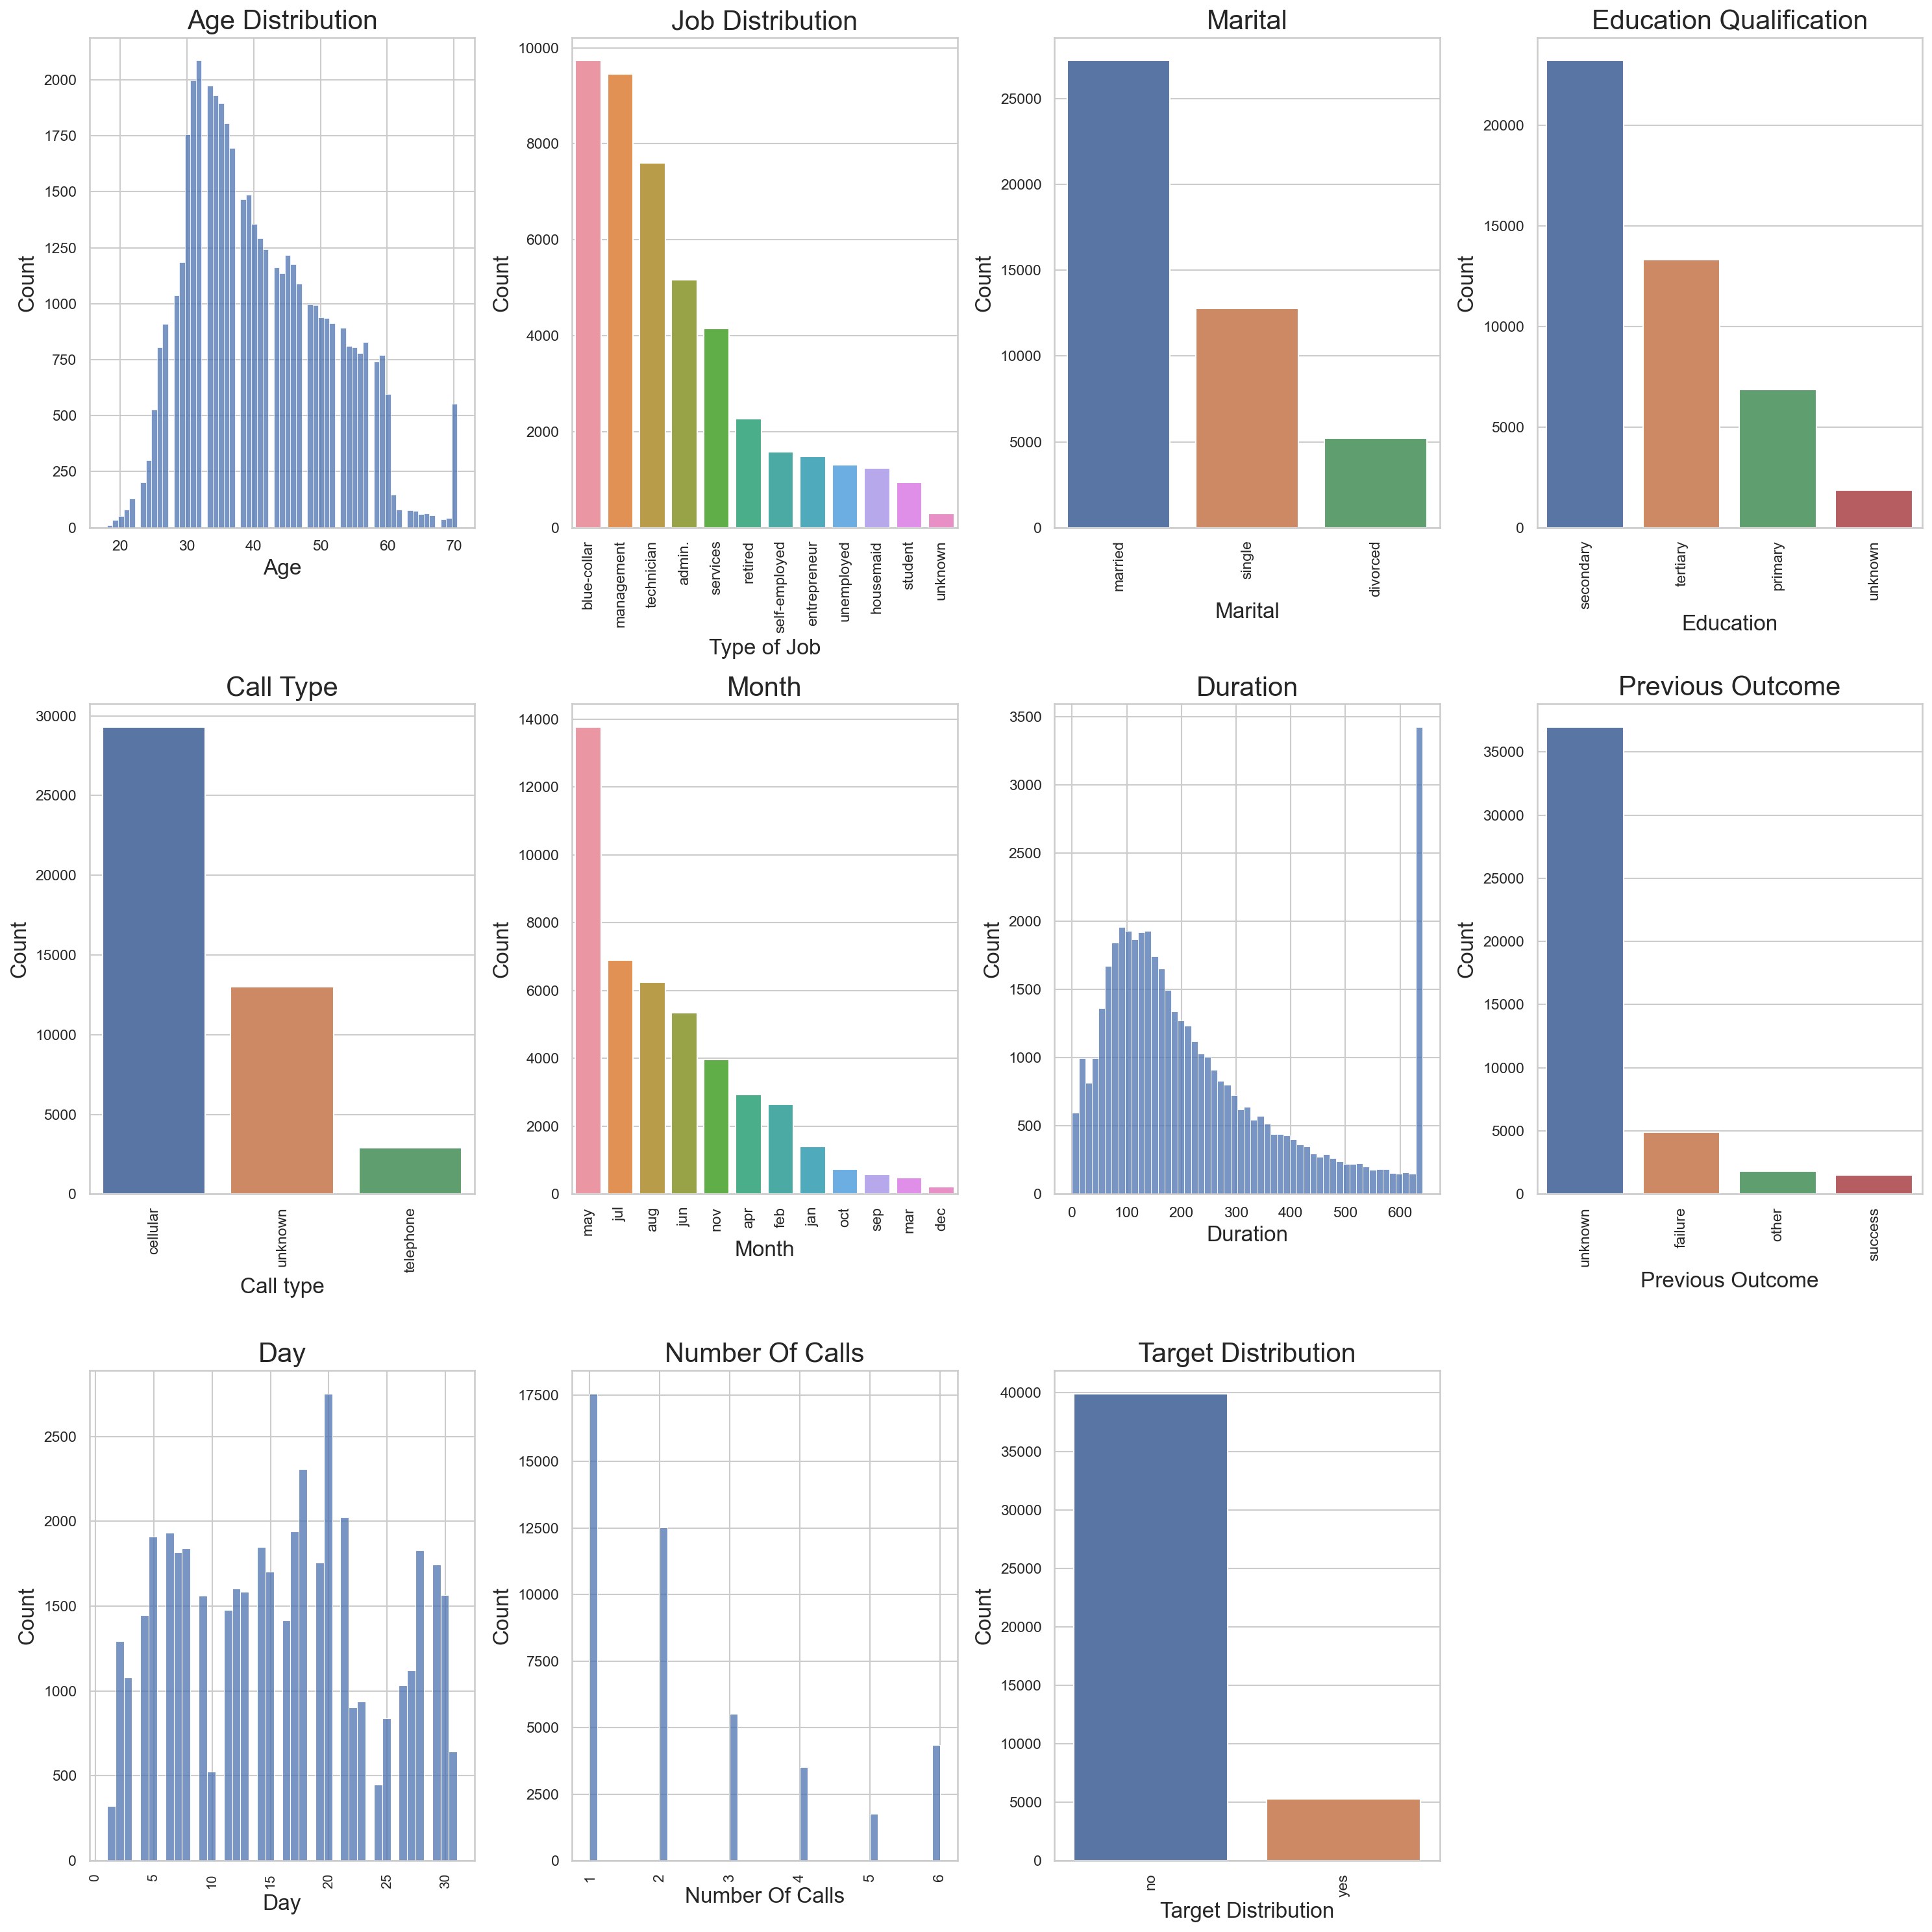

In [37]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=150)  
plt.subplot(3,4,1) 
sns.histplot(df.age) 
plt.title('Age Distribution', fontsize = 20) 
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

#Job distribution 
plt.subplot(3, 4, 2)
sns.countplot(x='job',data=df,order=df.job.value_counts().index)
plt.title('Job Distribution', fontsize=20)
plt.xlabel('Type of Job', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)

# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(x='marital',data=df,order=df.marital.value_counts().index) 
plt.title('Marital', fontsize = 20) 
plt.xlabel('Marital',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)

# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(x='education_qual',data=df,order=df.education_qual.value_counts().index) 
plt.title('Education Qualification', fontsize = 20) 
plt.xlabel('Education',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16) 

# Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(x ='call_type',data=df,order=df.call_type.value_counts().index) 
plt.title('Call Type', fontsize = 20) 
plt.xlabel('Call type',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

 # Mon distribution 
plt.subplot(3,4,6) 
sns.countplot(x='month',data=df,order=df.month.value_counts().index) 
plt.title('Month', fontsize = 20) 
plt.xlabel('Month',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)

# Dur distribution 
plt.subplot(3,4,7) 
sns.histplot(df.duration) 
plt.title('Duration', fontsize = 20) 
plt.xlabel('Duration',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

 # Previous outcome  distribution  
plt.subplot(3,4,8) 
sns.countplot(x='prev_outcome',data=df,order=df.prev_outcome.value_counts().index) 
plt.title('Previous Outcome', fontsize = 20) 
plt.xlabel('Previous Outcome',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

# Day distribution 
plt.subplot(3,4,9) 
sns.histplot(df['day']) 
plt.title('Day', fontsize = 20) 
plt.xlabel('Day',fontsize = 16) 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 16)

# Num call distribution 
plt.subplot(3,4,10) 
sns.histplot(df['num_calls']) 
plt.title('Number Of Calls', fontsize = 20) 
plt.xlabel('Number Of Calls',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

 # Target distribution 
plt.subplot(3,4,11) 
sns.countplot(x='result',data=df) 
plt.title('Target Distribution', fontsize = 20) 
plt.xlabel('Target Distribution',fontsize = 16)
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

plt.tight_layout()
plt.show()



# From the above plots we can clearly tell the following interpretation


# Features vs Target
Categorical Variable vs Target (Categorical) -- Job, Marital, Educational Qualification, Call Type, Month

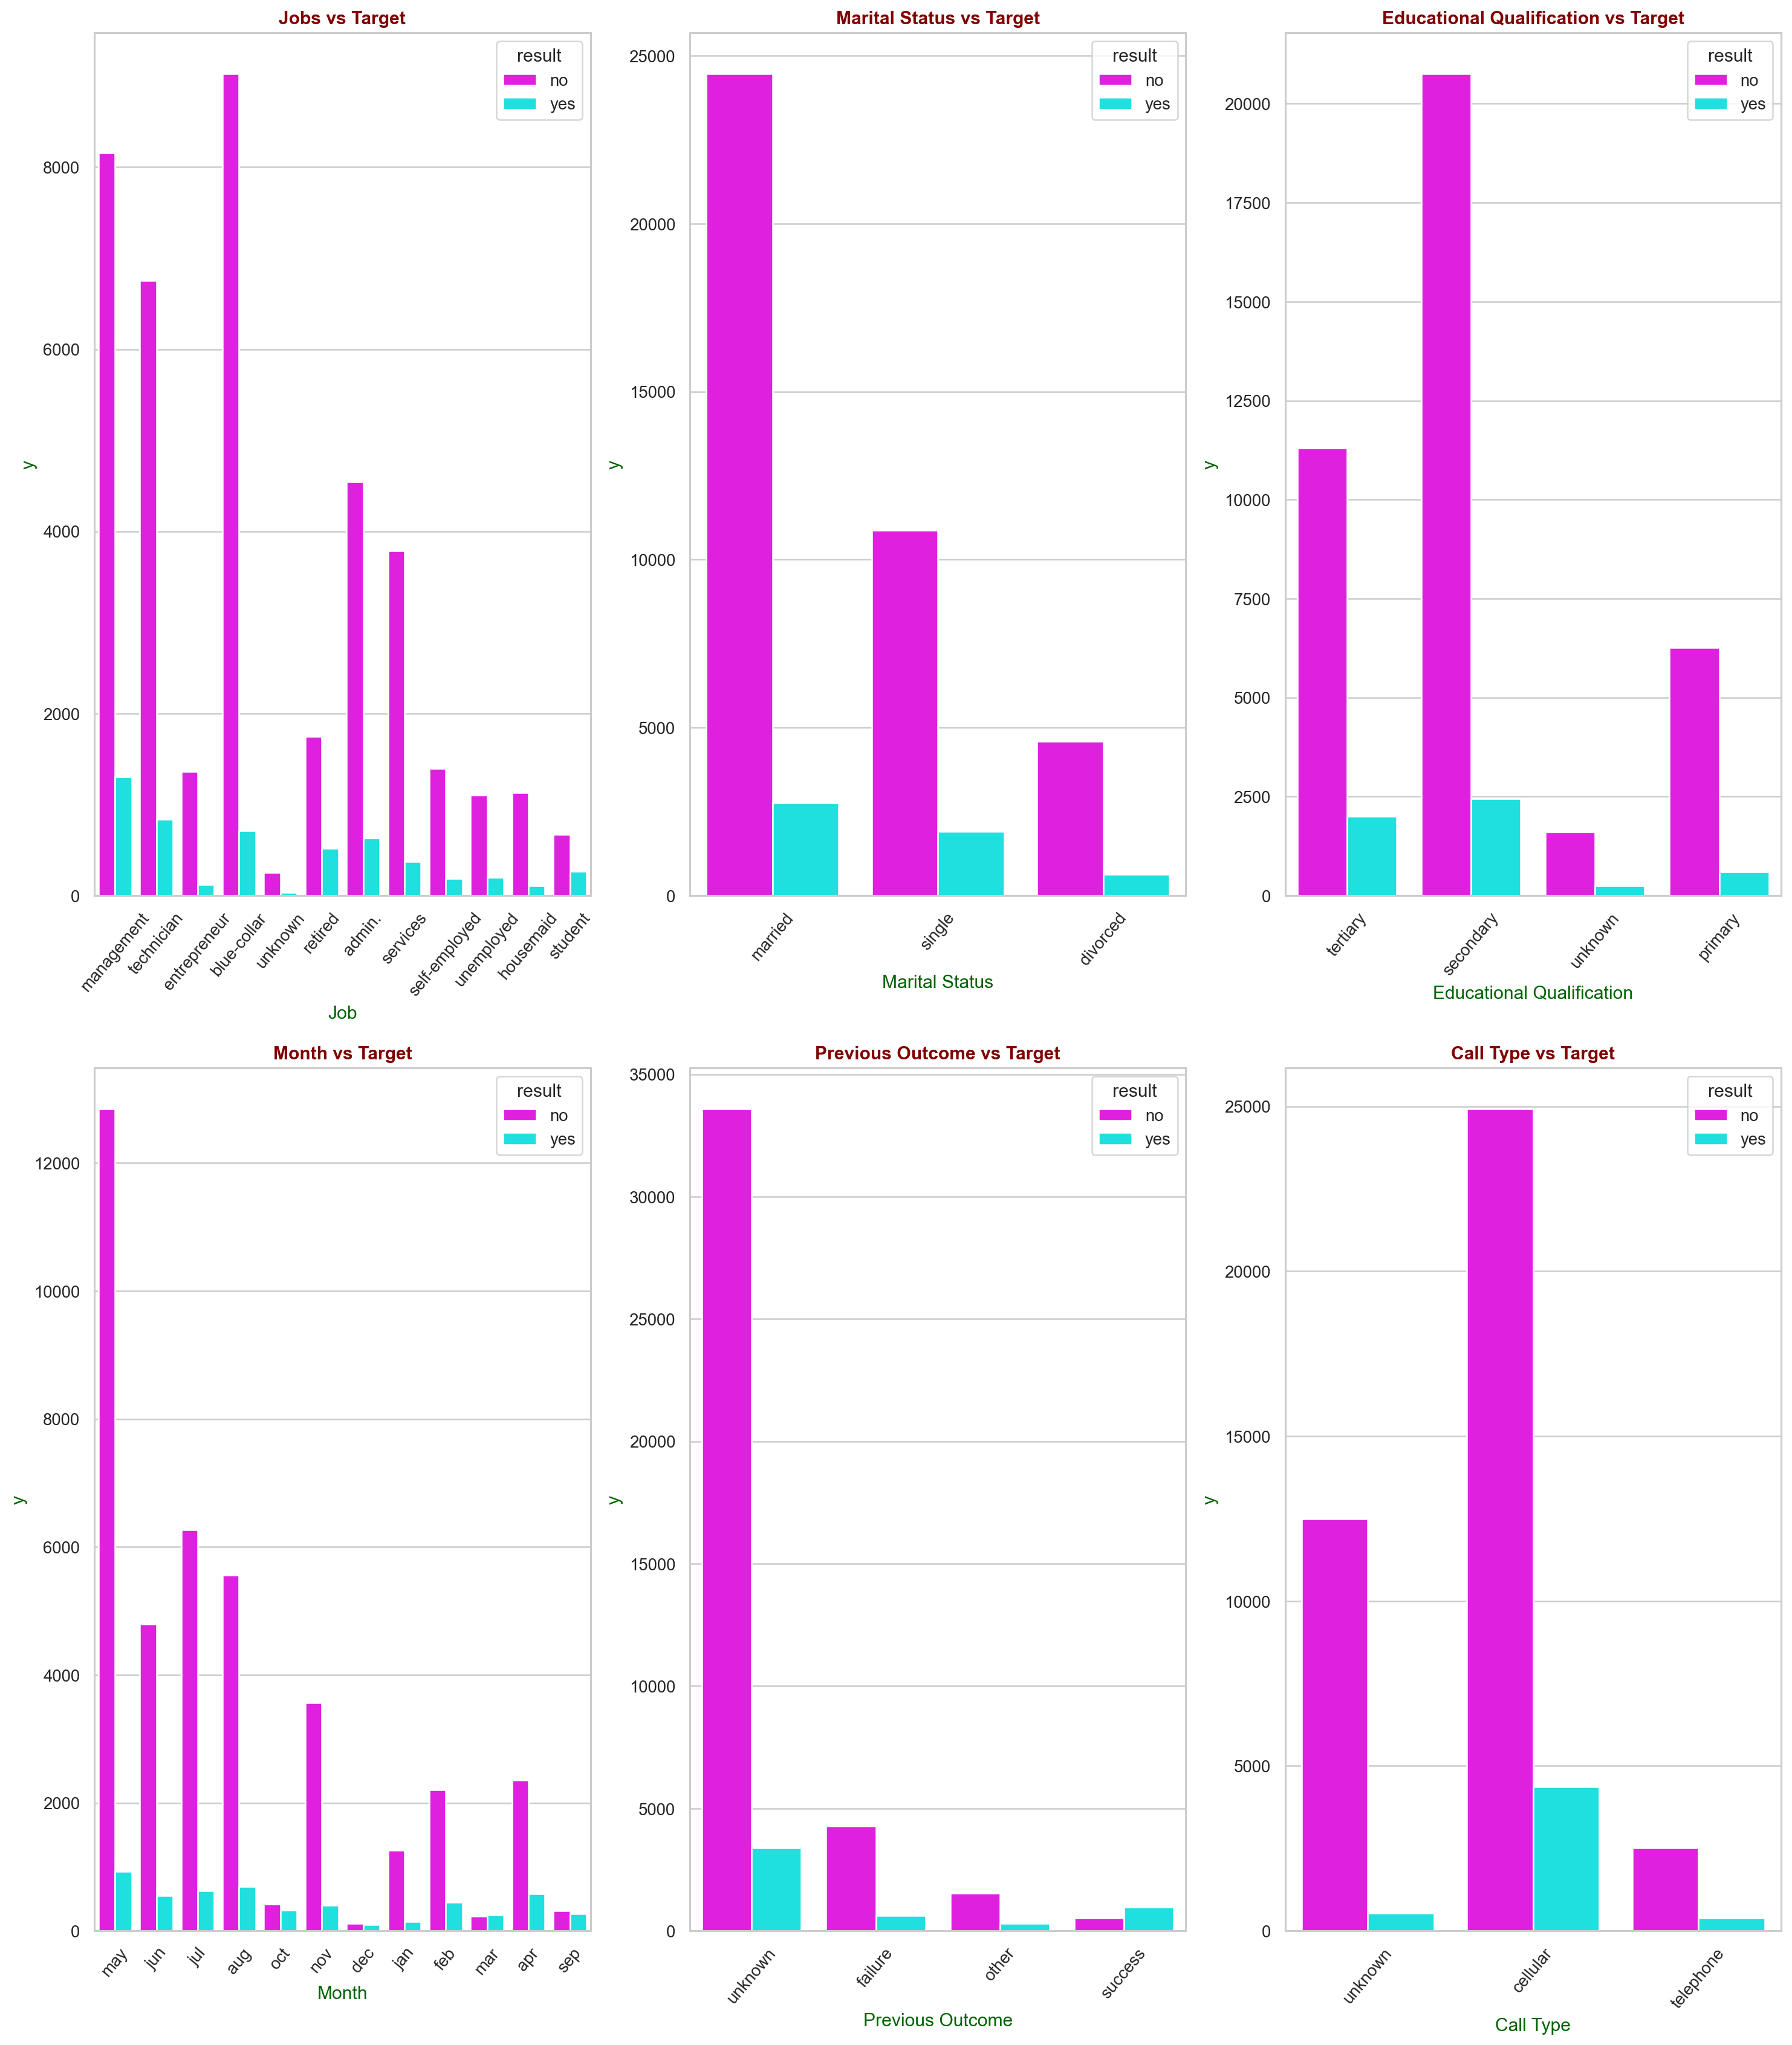

In [38]:
plt.figure(figsize=(20,35), dpi=180)
#plt.suptitle("Categorical Data Vs Target", fontsize=20, fontweight='bold', color='maroon')
#Jobs vs Target
plt.subplot(3,3,1)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='job',hue='result',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Jobs vs Target', fontweight='bold', color='maroon')
plt.xlabel('Job', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Marital Status vs Target
plt.subplot(3,3,2)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='marital',hue='result',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Marital Status vs Target', fontweight='bold', color='maroon')
plt.xlabel('Marital Status', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Educational Qualification vs Target
plt.subplot(3,3,3)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='education_qual',hue='result',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Educational Qualification vs Target', fontweight='bold', color='maroon')
plt.xlabel('Educational Qualification', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Month vs Target
plt.subplot(3,3,4)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='month',hue='result',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Month vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Month', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Previous Outcome vs Target
plt.subplot(3,3,5)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='prev_outcome',hue='result',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Previous Outcome vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Previous Outcome', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

#Call Type vs Target
plt.subplot(3,3,6)
my_colors = ['Magenta', 'cyan']
sns.countplot(x='call_type',hue='result',data=df, palette=my_colors)
plt.xticks(rotation=50)
plt.title('Call Type vs Target', fontweight='bold', color='maroon')
plt.xlabel('Call Type', color='DarkGreen')
plt.ylabel('y', color='DarkGreen')

plt.show()


# Plotting of Numerical data vs Target



Here we are plotting all our Numerical columns with target to figure out, is there any relation between numerical features column. Here we plot 2 type of numerical data:

Continous variable
discrete variable

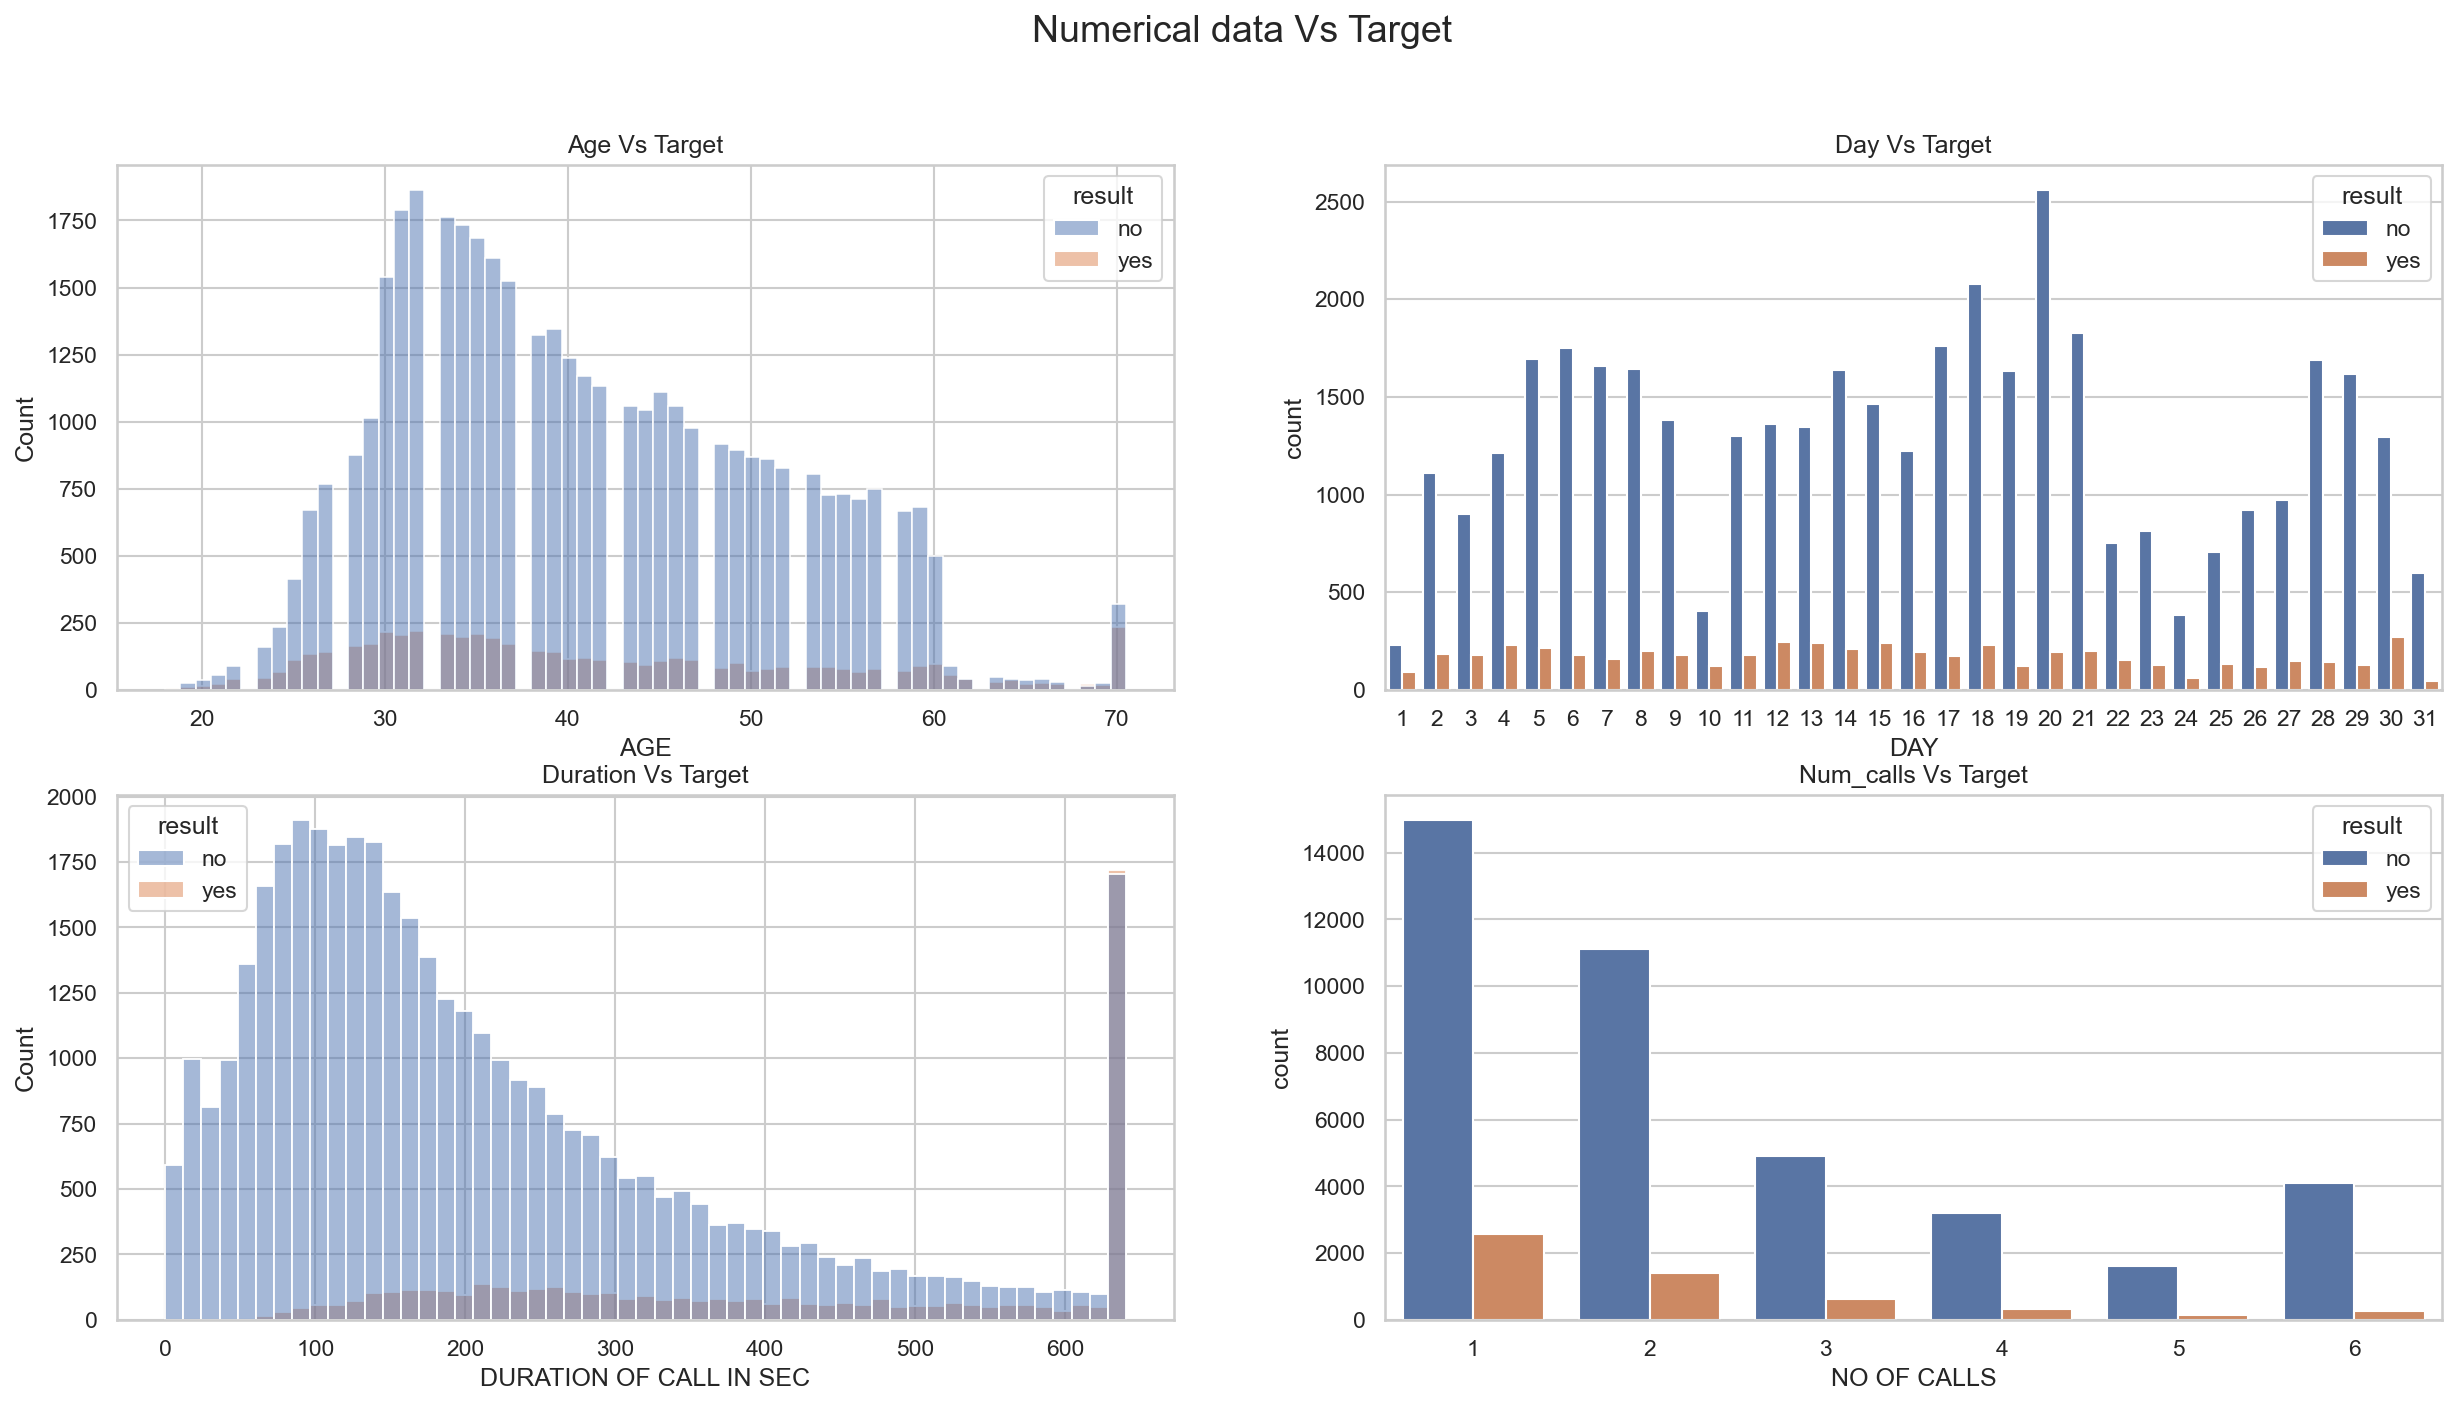

In [39]:
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(2,2,1)
sns.histplot(x='age',hue='result',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")

plt.subplot(2,2,2)
sns.countplot(x='day',hue='result',data=df)
plt.title("Day Vs Target")
plt.xlabel("DAY")

plt.subplot(2,2,3)
sns.histplot(x='duration',hue='result',data=df)
plt.title("Duration Vs Target")
plt.xlabel("DURATION OF CALL IN SEC")

plt.subplot(2,2,4)
sns.countplot(x='num_calls',hue='result',data=df)
plt.title("Num_calls Vs Target")
plt.xlabel("NO OF CALLS")

plt.suptitle("Numerical data Vs Target", fontsize=18)  #suptitle to show title for overall plot 
plt.show()

In [40]:
df = pd.get_dummies(df,columns=['job'],drop_first=True) # Create dummy variables for the job column, dropping the first level
df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})  #Convert the marital column to a numeric variable
df['education_qual'] = df['education_qual'].map({'secondary':0,'primary':2,'tertiary':1,'unknown':3})  #Convert the education_qual column to a numeric variable
df['call_type']= df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})   #Convert the call_type column to a numeric variable
df = pd.get_dummies(df,columns=['month'],drop_first=True)     #Create dummy variables for the month column
df = pd.get_dummies(df,columns=['prev_outcome'],drop_first=True)   #Create dummy variables for the prev_outcome column
df['result'] = df['result'].map({'no':0,'yes':1})       #Convert the result column to a numeric variable
df.head()

,age,marital,education_qual,call_type,day,duration,num_calls,result,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,0,1,1,5,261.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44.0,1,0,1,5,151.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33.0,0,0,1,5,76.0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47.0,0,3,1,5,92.0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33.0,1,3,1,5,198.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
x = df.drop('result',axis = 1)      #x will contain the features of the DataFrame, without the result column
y = df['result']                 #y will contain the target variable, which is the result column

In [42]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Balance Data with UnderSample

In [43]:
#  RandomUnderSampler class from the imbalanced-learn library to undersample the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_train_und, y_train_und = rus.fit_resample(x_train,y_train)

In [44]:
print(len(x_train_und))
print(len(y_train_und))


8508
8508


In [45]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scl = scaler.fit_transform(x_train_und)
x_test_scl = scaler.transform(x_test)

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [47]:
# Fits the logistic regression model to the training data and predicts the target variable for the test data
lr = LogisticRegression()
lr.fit(x_train_scl,y_train_und)
y_pred = lr.predict(x_test_scl)

In [48]:
log_acc=accuracy_score(y_test,y_pred)   #function calculates the accuracy of the model, which is the percentage of predictions that were correct.
log_per=precision_score(y_test,y_pred)  #function calculates the precision of the model, which is the percentage of positive predictions that were actually positive.
log_rec=recall_score(y_test,y_pred)     #function calculates the recall of the model, which is the percentage of positive instances that were correctly identified as positive.
log_F1=f1_score(y_test,y_pred)          #function calculates the F1 score of the model, which is a weighted average of the precision and recall scores.

In [49]:
print("result for UnderSample",log_acc,log_per,log_rec,log_F1)   #prints the results of the evaluation metrics

result for UnderSample 0.8217405728187548 0.37548554164868364 0.8405797101449275 0.5190930787589498


# Balance Data with SMOTE

In [50]:
#Balancing the data with oversample (SMOTE)
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scl_smt = scaler.fit_transform(x_train_smt)
x_test_scl_smt = scaler.transform(x_test)

In [52]:
print(len(x_train_smt))
print(len(y_train_smt))

51745
51745


In [53]:
lr = LogisticRegression()
lr.fit(x_train_scl_smt,y_train_smt)
y_pred1 = lr.predict(x_test_scl_smt)

In [54]:
log_acc_smt=accuracy_score(y_test,y_pred1)
log_per_smt=precision_score(y_test,y_pred1)
log_rec_smt=recall_score(y_test,y_pred1)
log_F1_smt=f1_score(y_test,y_pred1)

In [55]:
print("Result for OverSample(SMOTE)",log_acc_smt,log_per_smt,log_rec_smt,log_F1_smt)

Result for OverSample(SMOTE) 0.8327988499391795 0.38394160583941606 0.7623188405797101 0.5106796116504854


# K-Nearest Neighbour (KNN) with Undersample

The code you provided will train a K-Nearest Neighbors (KNN) model for different values of k, and then evaluate the performance of the model using cross-validation.

In [56]:
from sklearn.neighbors import KNeighborsClassifier   # Imports the KNeighborsClassifier class from the sklearn.neighbors library.
from sklearn.model_selection import cross_val_score  # imports the cross_val_score function and which trains and tests a model over multiple folds of your dataset
for i in range(1,20):  
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scl,y_train_und) 
  print("K value :", i, "knn_score: ", knn.score(x_train_scl,y_train_und), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scl, y_test, cv=10)))

K value : 1 knn_score:  1.0 Cross Value Accuracy : 0.8667471764533321
K value : 2 knn_score:  0.8815232722143864 Cross Value Accuracy : 0.886762944311348
K value : 3 knn_score:  0.8856370474847203 Cross Value Accuracy : 0.8859886080281623
K value : 4 knn_score:  0.8580159849553362 Cross Value Accuracy : 0.8915182369334573
K value : 5 knn_score:  0.8628349788434415 Cross Value Accuracy : 0.8911865007578351
K value : 6 knn_score:  0.8426187118006582 Cross Value Accuracy : 0.89262504278101
K value : 7 knn_score:  0.8516690173953926 Cross Value Accuracy : 0.890965261819782
K value : 8 knn_score:  0.8350963798777621 Cross Value Accuracy : 0.8939518652520413
K value : 9 knn_score:  0.8433239304184297 Cross Value Accuracy : 0.8941727374957218
K value : 10 knn_score:  0.8306299952985425 Cross Value Accuracy : 0.8915192147851172
K value : 11 knn_score:  0.8362717442407146 Cross Value Accuracy : 0.8935096318388499
K value : 12 knn_score:  0.8260460742830278 Cross Value Accuracy : 0.8909659952085

K value : 8 knn_score:  0.8327802796871296 Cross Value Accuracy : 0.8894173226421552

In [57]:
# The code you provided will create a KNN object and fit it to the Undersample training data 
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scl,y_train_und)
y_pred_kun= knn.predict(x_test_scl)
print(knn.score(x_train_scl,y_train_und))

0.8433239304184297


In [58]:
log_acc_kund=accuracy_score(y_test,y_pred_kun)
log_per_kund=precision_score(y_test,y_pred_kun)
log_rec_kund=recall_score(y_test,y_pred_kun)
log_F1_kund=f1_score(y_test,y_pred_kun)

In [59]:
print("result for UnderSample",log_acc_kund,log_per_kund,log_rec_kund,log_F1_kund)

result for UnderSample 0.8191971690810572 0.36784140969163 0.8067632850241546 0.5052950075642966


# K-Nearest Neighbour (KNN) with SMOTE

In [60]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in range(1,20):
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scl_smt,y_train_smt) 
  print("K value :", i, "knn_score: ", knn.score(x_train_scl_smt,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scl_smt, y_test, cv=10)))

K value : 1 knn_score:  1.0 Cross Value Accuracy : 0.8667469319904171
K value : 2 knn_score:  0.9708377621026186 Cross Value Accuracy : 0.8862100914291302
K value : 3 knn_score:  0.9657358198859793 Cross Value Accuracy : 0.8853248912140028
K value : 4 knn_score:  0.9588366025702967 Cross Value Accuracy : 0.8895276976482668
K value : 5 knn_score:  0.9573678616291429 Cross Value Accuracy : 0.8904122867061067
K value : 6 knn_score:  0.9524205237220987 Cross Value Accuracy : 0.8918505842663667
K value : 7 knn_score:  0.9522659194125036 Cross Value Accuracy : 0.8903021561629101
K value : 8 knn_score:  0.9492897864527974 Cross Value Accuracy : 0.8915195814794897
K value : 9 knn_score:  0.9489805778336071 Cross Value Accuracy : 0.8929567789566322
K value : 10 knn_score:  0.9461783747221953 Cross Value Accuracy : 0.8908562313597027
K value : 11 knn_score:  0.9457725384095081 Cross Value Accuracy : 0.8926255317068401
K value : 12 knn_score:  0.9441491931587593 Cross Value Accuracy : 0.890966973

K value : 9 knn_score:  0.949348209270343 Cross Value Accuracy : 0.893175939959908

In [62]:
# The code you provided will create a KNN object and fit it to the oversample smote training data 
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scl_smt,y_train_smt)
y_pred_ksmt= knn.predict(x_test_scl_smt)
print(knn.score(x_train_scl_smt,y_train_smt))

0.9489805778336071


In [63]:
log_acc_ksmt=accuracy_score(y_test,y_pred_ksmt)
log_per_ksmt=precision_score(y_test,y_pred_ksmt)
log_rec_ksmt=recall_score(y_test,y_pred_ksmt)
log_F1_ksmt=f1_score(y_test,y_pred_ksmt)

In [64]:
print("Result for OverSample(SMOTE)",log_acc_ksmt,log_per_ksmt,log_rec_ksmt,log_F1_ksmt)

Result for OverSample(SMOTE) 0.8496074311622249 0.402636309167166 0.6492753623188405 0.4970414201183432


# Decision Tree with Undersample

The DecisionTreeClassifier is a supervised learning algorithm that can be used for both classification and regression problems

In [65]:
#  The code you provided will create a DecisionTreeClassifier object and fit it to the Undersample training data 
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier() 
dtc.fit(x_train_scl,y_train_und) 

DecisionTreeClassifier()

In [66]:
## The code you provided will train a DecisionTreeClassifier model with different values of depth
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dtc= DecisionTreeClassifier(max_depth=depth) 
  dtc.fit(x_train_scl,y_train_und) 
  dtc= DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dtc,x_test_scl, y_test, cv=10) 
  print("Depth  : ", depth,  " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Cross val score :  0.8848832689580991
Depth  :  2  Cross val score :  0.8920709675842176
Depth  :  3  Cross val score :  0.9030191169999512
Depth  :  4  Cross val score :  0.9026878697501589
Depth  :  5  Cross val score :  0.9025767613553025
Depth  :  6  Cross val score :  0.9022450251796803
Depth  :  7  Cross val score :  0.8993702635310223
Depth  :  8  Cross val score :  0.8948354764582215
Depth  :  9  Cross val score :  0.8941728597271792
Depth  :  10  Cross val score :  0.8919604703466485
Depth  :  20  Cross val score :  0.8776939813230333


Depth  :  3  Cross val score :  0.9030191169999512

In [67]:
dtc= DecisionTreeClassifier(max_depth=3) 
dtc.fit(x_train_scl,y_train_und) 
y_pred_dtun= knn.predict(x_test_scl)

In [68]:
log_acc_dtu=accuracy_score(y_test,y_pred_dtun)
log_per_dtu=precision_score(y_test,y_pred_dtun)
log_rec_dtu=recall_score(y_test,y_pred_dtun)
log_F1_dtu=f1_score(y_test,y_pred_dtun)

In [69]:
print("result for UnderSample",log_acc_dtu,log_per_dtu,log_rec_dtu,log_F1_dtu)

result for UnderSample 0.8477275240517528 0.40127020785219397 0.6714975845410628 0.5023491145645103


# Decision Tree with SMOTE

In [70]:
#  The code you provided will create a DecisionTreeClassifier object and fit it to the oversample smote training data 
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier() 
dtc.fit(x_train_scl_smt,y_train_smt) 
dtc.predict(x_test_scl_smt)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [71]:
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dtc= DecisionTreeClassifier(max_depth=depth) 
  dtc.fit(x_train_scl_smt,y_train_smt) 
  dtc= DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dtc,x_test_scl_smt, y_test, cv=10) 
  print("Depth  : ", depth,  " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Cross val score :  0.8848832689580991
Depth  :  2  Cross val score :  0.8920709675842176
Depth  :  3  Cross val score :  0.9030191169999512
Depth  :  4  Cross val score :  0.9025773725125898
Depth  :  5  Cross val score :  0.9025767613553024
Depth  :  6  Cross val score :  0.9015815528284359
Depth  :  7  Cross val score :  0.8992595218305383
Depth  :  8  Cross val score :  0.8954983376521781
Depth  :  9  Cross val score :  0.8943934875079451
Depth  :  10  Cross val score :  0.8931758177284503
Depth  :  20  Cross val score :  0.8785796704639907


In [72]:
dtc= DecisionTreeClassifier(max_depth=3) 
dtc.fit(x_train_scl_smt,y_train_smt) 
y_pred_dtsm= knn.predict(x_test_scl_smt)

In [73]:
log_acc_dts=accuracy_score(y_test,y_pred_dtsm)
log_per_dts=precision_score(y_test,y_pred_dtsm)
log_rec_dts=recall_score(y_test,y_pred_dtsm)
log_F1_dts=f1_score(y_test,y_pred_dtsm)

In [74]:
print("Result for OverSample(SMOTE)",log_acc_dts,log_per_dts,log_rec_dts,log_F1_dts)

Result for OverSample(SMOTE) 0.8496074311622249 0.402636309167166 0.6492753623188405 0.4970414201183432


# XG BOOST with Undersample

XGBoost, short for Extreme Gradient Boosting, is an open-source software library that implements the gradient boosting algorithm for machine learning. It is a popular choice for both classification and regression problems, and it is known for its high accuracy and speed.

In [75]:
#The code you provided will create a XGBOOST object and fit it to the undersample training data
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators=100,verbosity = 0)
xgb.fit(x_train_scl, y_train_und)
y_predict_xgu=xgb.predict(x_test_scl)

In [76]:
log_acc_xgu=accuracy_score(y_test,y_predict_xgu)
log_per_xgu=precision_score(y_test,y_predict_xgu)
log_rec_xgu=recall_score(y_test,y_predict_xgu)
log_F1_xgu=f1_score(y_test,y_predict_xgu)

In [77]:
print("result for UnderSample",log_acc_xgu,log_per_xgu,log_rec_xgu,log_F1_xgu)

result for UnderSample 0.8459581997124848 0.41944194419441944 0.9004830917874396 0.5723058028860915


# XG BOOST with SMOTE

In [78]:
#  The code you provided will create a XGBOOST object and fit it to the oversample SMOTE training data 

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators=100,verbosity = 0)
xgb.fit(x_train_scl_smt ,y_train_smt)
y_predict_xgsm=xgb.predict(x_test_scl_smt)

In [79]:
log_acc_xgs=accuracy_score(y_test,y_predict_xgsm)
log_per_xgs=precision_score(y_test,y_predict_xgsm)
log_rec_xgs=recall_score(y_test,y_predict_xgsm)
log_F1_xgs=f1_score(y_test,y_predict_xgsm)

In [80]:
print("Result for OverSample(SMOTE)",log_acc_xgs,log_per_xgs,log_rec_xgs,log_F1_xgs)

Result for OverSample(SMOTE) 0.8686276678093553 0.4574763757643135 0.7951690821256039 0.5808045165843332


# Random forest with Undersample

The RandomForestClassifier is an ensemble learning algorithm that combines multiple decision trees to make predictions. It is a powerful algorithm that can be used for both classification and regression problems.

In [81]:
#  The code you provided will create a Random forest object and fit it to the Undersample training data 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100,150],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5]
}

clf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring ="accuracy", cv = 5, n_jobs = 8, verbose = 2)
clf.fit(x_train_scl,y_train_und)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy', verbose=2)

In [82]:
clf.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=3)

In [83]:
for depth in range(11,31):
    rf = RandomForestClassifier(max_depth=depth, n_estimators=50, min_samples_split=3, min_samples_leaf=2)
    rf.fit(x_train_scl,y_train_und)
    rf = RandomForestClassifier(max_depth=depth)
    val_score = np.mean(cross_val_score(rf, x_test_scl, y_test, cv=10, scoring='accuracy'))
    print("Depth  : ", depth, " Cross val score : " ,val_score)

Depth  :  11  Cross val score :  0.8992597662934534
Depth  :  12  Cross val score :  0.9014721556739843
Depth  :  13  Cross val score :  0.9025771280496748
Depth  :  14  Cross val score :  0.9006973304649686
Depth  :  15  Cross val score :  0.8998109079352663
Depth  :  16  Cross val score :  0.8997012663178994
Depth  :  17  Cross val score :  0.8977113381899965
Depth  :  18  Cross val score :  0.8989281523492887
Depth  :  19  Cross val score :  0.8967164963575026
Depth  :  20  Cross val score :  0.8985956827849216
Depth  :  21  Cross val score :  0.8983749327726984
Depth  :  22  Cross val score :  0.8985964161736664
Depth  :  23  Cross val score :  0.8987067911797778
Depth  :  24  Cross val score :  0.8979320882022197
Depth  :  25  Cross val score :  0.8968262602063268
Depth  :  26  Cross val score :  0.8981534493717304
Depth  :  27  Cross val score :  0.8984857967046398
Depth  :  28  Cross val score :  0.8968263824377841
Depth  :  29  Cross val score :  0.8981535716031879
Depth  :  30

In [84]:
rf = RandomForestClassifier(max_depth=13, n_estimators=50, min_samples_split=5, min_samples_leaf=3)
rf.fit(x_train_scl,y_train_und)

RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50)

In [85]:
y_pred_rfund = rf.predict(x_test_scl)

In [86]:
log_acc_rfu=accuracy_score(y_test,y_pred_rfund)
log_per_rfu=precision_score(y_test,y_pred_rfund)
log_rec_rfu=recall_score(y_test,y_pred_rfund)
log_F1_rfu=f1_score(y_test,y_pred_rfund)

In [87]:
print("result for UnderSample",log_acc_rfu,log_per_rfu,log_rec_rfu,log_F1_rfu)

result for UnderSample 0.8293707840318478 0.39398998330550916 0.9120772946859903 0.5502768872048964


# Random forest with SMOTE

In [88]:
#  The code you provided will create a Random forest object and fit it to the oversample SMOTE training data 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

param_grid_smt = {
    'n_estimators': [10, 50, 100,150],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5]
}

clf = GridSearchCV(estimator = rf, param_grid = param_grid_smt, scoring ="accuracy", cv = 5, n_jobs = 8, verbose = 2)
clf.fit(x_train_scl_smt ,y_train_smt)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='accuracy', verbose=2)

In [89]:
clf.best_estimator_

RandomForestClassifier(min_samples_leaf=2)

In [90]:
for depth in range(11,31):
    rf = RandomForestClassifier(max_depth=depth, n_estimators=150, min_samples_split=5, min_samples_leaf=2)
    rf.fit(x_train_scl_smt ,y_train_smt)
    rf = RandomForestClassifier(max_depth=depth)
    val_score = np.mean(cross_val_score(rf, x_test_scl_smt, y_test, cv=10, scoring='accuracy'))
    print("Depth  : ", depth, " Cross val score : " ,val_score)

Depth  :  11  Cross val score :  0.9013605583532976
Depth  :  12  Cross val score :  0.899701877475187
Depth  :  13  Cross val score :  0.9004757248325431
Depth  :  14  Cross val score :  0.8995907690803305
Depth  :  15  Cross val score :  0.9008078277025376
Depth  :  16  Cross val score :  0.8990380384295701
Depth  :  17  Cross val score :  0.8988172884173471
Depth  :  18  Cross val score :  0.8982645577665869
Depth  :  19  Cross val score :  0.8992592773676232
Depth  :  20  Cross val score :  0.8982650466924167
Depth  :  21  Cross val score :  0.8983743216154109
Depth  :  22  Cross val score :  0.8989285190436611
Depth  :  23  Cross val score :  0.8966051434997311
Depth  :  24  Cross val score :  0.8991485356671391
Depth  :  25  Cross val score :  0.8980429521341613
Depth  :  26  Cross val score :  0.8960529017748007
Depth  :  27  Cross val score :  0.895943260157434
Depth  :  28  Cross val score :  0.8982638243778419
Depth  :  29  Cross val score :  0.8985954383220065
Depth  :  30  

In [91]:
rf = RandomForestClassifier(max_depth=15, n_estimators=150, min_samples_split=5, min_samples_leaf=2)
rf.fit(x_train_scl_smt ,y_train_smt)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150)

In [92]:
y_pred_rfsmt = rf.predict(x_test_scl_smt)

In [93]:
log_acc_rfs=accuracy_score(y_test,y_pred_rfsmt)
log_per_rfs=precision_score(y_test,y_pred_rfsmt)
log_rec_rfs=recall_score(y_test,y_pred_rfsmt)
log_F1_rfs=f1_score(y_test,y_pred_rfsmt)

In [94]:
print("Result for OverSample(SMOTE)",log_acc_rfs,log_per_rfs,log_rec_rfs,log_F1_rfs)

Result for OverSample(SMOTE) 0.8497180139334292 0.42314990512333966 0.8618357487922705 0.5676105631562203


In [95]:
imp_features = pd.DataFrame({'Importance' : rf.feature_importances_},index = x.columns)
imp_features.sort_values(by='Importance', ascending=False)

,Importance
duration,0.446534
prev_outcome_unknown,0.083792
month_may,0.066932
call_type,0.052072
job_blue-collar,0.039213
num_calls,0.037318
age,0.037143
month_jul,0.033288
day,0.028374
month_nov,0.026509


Duration: The duration of the call is the most important feature, which suggests that the length of a call is a good predictor of whether the call will be successful. This is likely because longer calls are more likely to involve in insurance, which are more likely to be resolved successfully.

# conclusion  :- 

Undersampling and SMOTE are two of the most common methods for balancing imbalanced data. Undersampling reduces the number of examples in the majority class, while SMOTE creates synthetic examples of the minority class. This can help to improve the performance of machine learning models on imbalanced datasets.

Here are some of the advantages of using undersampling and SMOTE to balance data:---

They can be effective in improving the performance of machine learning models on imbalanced datasets.

They are relatively easy to implement.

They can be used with a variety of machine learning algorithms.


I used the F1 score to evaluate the performance of my binary classification model. The F1 score is a measure of accuracy that takes into account both the false positive rate and the false negative rate. It is calculated as the harmonic mean of precision and recall.

The F1 score is calculated as follows:

F1 = 2 * (precision * recall) / (precision + recall)

The machine learning algorithm and its F1 score are as below:---

Logistic Regression :--

F1 score with undersampling =  0.5190930787589498  ~ 51%

F1 score with SMOTE =  0.5106796116504854  ~ 51%

K-Nearest Neighbour (KNN) :--

F1 score with undersampling = 0.5052950075642966

F1 score with SMOTE =  0.4970414201183432

Decision Tree  :--

F1 score with undersampling = 0.5023491145645103

F1 score with SMOTE =  0.4970414201183432

XG BOOST  :--

F1 score with undersampling = 0.5723058028860915

F1 score with SMOTE =  0.5808045165843332

Random forest  :--
F1 score with undersampling = 0.5502768872048964

F1 score with SMOTE =  0.5676105631562203


Here are some conclusions that we can build with the scores you provided:

XGBoost had the highest F1 score with both undersampling and SMOTE. This suggests that XGBoost is the most effective algorithm for this problem.

Logistic regression had the lowest F1 score with both undersampling and SMOTE. This suggests that logistic regression is not the most effective algorithm for this problem.

The F1 scores with SMOTE were slightly higher than the F1 scores with undersampling. This suggests that SMOTE may be a slightly more effective method for balancing the data than undersampling.

The F1 scores for all algorithms were relatively low. This suggests that the data is highly imbalanced, and that it may be difficult to achieve high accuracy with any algorithm.
